In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./source/salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [3]:
inputs = df.drop('salary_more_then_100k', axis = 'columns')
target = df['salary_more_then_100k']

In [4]:
inputs.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [5]:
target.head()

0    0
1    0
2    1
3    1
4    0
Name: salary_more_then_100k, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
ln_company = LabelEncoder()
ln_job = LabelEncoder()
ln_degree = LabelEncoder()

In [8]:
inputs['company_n'] = ln_company.fit_transform(inputs['company'])
inputs['job_n'] = ln_job.fit_transform(inputs['job'])
inputs['degree_n'] = ln_degree.fit_transform(inputs['degree'])

In [9]:
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [10]:
inputs_n = inputs.drop(['company','job','degree'], axis='columns')
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [11]:
from sklearn import tree

In [12]:
model = tree.DecisionTreeClassifier()
model.fit(inputs_n,target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [13]:
model.score(inputs_n, target)

1.0

In [14]:
model.predict([[2,2,1]])

array([0], dtype=int64)

In [15]:
model.predict([[2,0,1]])

array([1], dtype=int64)

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
y_pred = model.predict(inputs_n)
cm = confusion_matrix(target,y_pred)
cm

array([[ 6,  0],
       [ 0, 10]], dtype=int64)

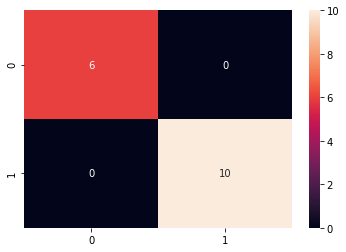

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.show()